In [1]:
from sklearn.datasets import load_diabetes
import pickle
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import os
import torch


from synthcity.metrics.eval_performance import (
    PerformanceEvaluatorMLP,
    PerformanceEvaluatorXGB,
)
from synthcity.utils import reproducibility
from synthcity.plugins import Plugins
import synthcity.logger as log
from synthcity.plugins.core.dataloader import GenericDataLoader
from DGE_utils import metric_different_datasets, mean_across_pandas, add_std, get_folder_names

reproducibility.clear_cache()
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


assert device.type == 'cuda'
Plugins(categories=["generic"]).list()

[2023-12-04T11:30:33.938413+0000][29447][CRITICAL] load failed: 
GReaT is not installed. Please install it with pip install GReaT.
Please be aware that GReaT is only available for python >= 3.9.

[2023-12-04T11:30:33.939659+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:30:33.940433+0000][29447][CRITICAL] module plugin_great load failed
[2023-12-04T11:30:33.947985+0000][29447][CRITICAL] module disabled: /home/JacquelineYau/deep_generative_ensemble/synthcity/src/synthcity/plugins/generic/plugin_goggle.py


['nflow',
 'uniform_sampler',
 'marginal_distributions',
 'rtvae',
 'ctgan',
 'arf',
 'ddpm',
 'tvae',
 'dummy_sampler',
 'bayesian_network']

In [2]:
from DGE_data import get_real_and_synthetic, load_real_data, get_synthetic_data

print("cuda available? " + str(torch.cuda.is_available()))
print("torch device: " + str(device))
# let's restrict ourselves to classification datasets
# datasets = ['moons', 'circles', 'breast_cancer',
#            'adult',  'seer', 'covid']
datasets = ['moons', 'circles', 'breast_cancer',
            'adult', 'covid']
# ['moons', 'circles','cal_housing', 'adult', 'diabetes', 'breast_cancer',  'seer', 'cutract' ]
model_name = 'ctgan'  # synthetic data model

n_models = 5  # number of models in ensemble, for each run orig: 20
max_n = 2000  # maximum number of data points to use for training generative model.
nsyn = 2000  # number of synthetic data points per synthetic dataset. Defaults to same as generative training size if None

num_runs = 1 # Number of runs. Don't choose to large, since total number of synthetic datasets is num_runs*n_models, orig:10

# Whether to load and save models and synthetic datasets
load = True  # results
load_syn = True  # data
save = True  # save results and data

verbose = True

cuda available? True
torch device: cuda


[2023-12-04T11:30:44.750708+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:30:44.751698+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:30:44.752399+0000][29447][CRITICAL] module plugin_great load failed
[2023-12-04T11:30:44.753339+0000][29447][CRITICAL] module disabled: /home/JacquelineYau/deep_generative_ensemble/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-12-04T11:30:44.904240+0000][29447][CRITICAL] load failed: libcudart.so.12: cannot open shared object file: No such file or directory
[2023-12-04T11:30:44.905126+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2023-12-04T11:30:44.905863+0000][29447][CRITICAL] module plugin_decaf load failed


np.unique(y):  [1 2]
n_total 20000 n_train: 2000
Generating synthetic data with model:  ctgan
Generating new data, filename is synthetic_data_testing/covid/ctgan/Xsyn_n2000_seed0.pkl
Training model 1/5
self._plugins:  {'uniform_sampler': <class 'synthcity.plugins.generic.plugin_uniform_sampler.UniformSamplerPlugin'>, 'bayesian_network': <class 'synthcity.plugins.generic.plugin_bayesian_network.BayesianNetworkPlugin'>, 'ctgan': <class 'synthcity.plugins.generic.plugin_ctgan.CTGANPlugin'>, 'marginal_distributions': <class 'synthcity.plugins.generic.plugin_marginal_distributions.MarginalDistributionPlugin'>, 'dummy_sampler': <class 'synthcity.plugins.generic.plugin_dummy_sampler.DummySamplerPlugin'>, 'arf': <class 'synthcity.plugins.generic.plugin_arf.ARFPlugin'>, 'ddpm': <class 'synthcity.plugins.generic.plugin_ddpm.TabDDPMPlugin'>, 'rtvae': <class 'synthcity.plugins.generic.plugin_rtvae.RTVAEPlugin'>, 'nflow': <class 'synthcity.plugins.generic.plugin_nflow.NormalizingFlowsPlugin'>, 'tva

 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [08:37<07:49,  2.03it/s]
[2023-12-04T11:39:26.838070+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:39:26.839070+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:39:26.839905+0000][29447][CRITICAL] module plugin_great load failed
[2023-12-04T11:39:26.840761+0000][29447][CRITICAL] module disabled: /home/JacquelineYau/deep_generative_ensemble/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-12-04T11:39:26.842273+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2023-12-04T11:39:26.843058+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribu

Generating new data, filename is synthetic_data_testing/covid/ctgan/Xsyn_n2000_seed1.pkl
Training model 2/5
self._plugins:  {'uniform_sampler': <class 'synthcity.plugins.generic.plugin_uniform_sampler.UniformSamplerPlugin'>, 'bayesian_network': <class 'synthcity.plugins.generic.plugin_bayesian_network.BayesianNetworkPlugin'>, 'ctgan': <class 'synthcity.plugins.generic.plugin_ctgan.CTGANPlugin'>, 'marginal_distributions': <class 'synthcity.plugins.generic.plugin_marginal_distributions.MarginalDistributionPlugin'>, 'dummy_sampler': <class 'synthcity.plugins.generic.plugin_dummy_sampler.DummySamplerPlugin'>, 'arf': <class 'synthcity.plugins.generic.plugin_arf.ARFPlugin'>, 'ddpm': <class 'synthcity.plugins.generic.plugin_ddpm.TabDDPMPlugin'>, 'rtvae': <class 'synthcity.plugins.generic.plugin_rtvae.RTVAEPlugin'>, 'nflow': <class 'synthcity.plugins.generic.plugin_nflow.NormalizingFlowsPlugin'>, 'tvae': <class 'synthcity.plugins.generic.plugin_tvae.TVAEPlugin'>}
self._available_plugins:  {'un

 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [08:53<08:03,  1.96it/s]
[2023-12-04T11:48:22.543700+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:48:22.544561+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:48:22.545317+0000][29447][CRITICAL] module plugin_great load failed
[2023-12-04T11:48:22.546068+0000][29447][CRITICAL] module disabled: /home/JacquelineYau/deep_generative_ensemble/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-12-04T11:48:22.547520+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2023-12-04T11:48:22.548247+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribu

Generating new data, filename is synthetic_data_testing/covid/ctgan/Xsyn_n2000_seed2.pkl
Training model 3/5
self._plugins:  {'uniform_sampler': <class 'synthcity.plugins.generic.plugin_uniform_sampler.UniformSamplerPlugin'>, 'bayesian_network': <class 'synthcity.plugins.generic.plugin_bayesian_network.BayesianNetworkPlugin'>, 'ctgan': <class 'synthcity.plugins.generic.plugin_ctgan.CTGANPlugin'>, 'marginal_distributions': <class 'synthcity.plugins.generic.plugin_marginal_distributions.MarginalDistributionPlugin'>, 'dummy_sampler': <class 'synthcity.plugins.generic.plugin_dummy_sampler.DummySamplerPlugin'>, 'arf': <class 'synthcity.plugins.generic.plugin_arf.ARFPlugin'>, 'ddpm': <class 'synthcity.plugins.generic.plugin_ddpm.TabDDPMPlugin'>, 'rtvae': <class 'synthcity.plugins.generic.plugin_rtvae.RTVAEPlugin'>, 'nflow': <class 'synthcity.plugins.generic.plugin_nflow.NormalizingFlowsPlugin'>, 'tvae': <class 'synthcity.plugins.generic.plugin_tvae.TVAEPlugin'>}
self._available_plugins:  {'un

 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [08:36<07:48,  2.03it/s]
[2023-12-04T11:57:01.212132+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:57:01.213031+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T11:57:01.213698+0000][29447][CRITICAL] module plugin_great load failed
[2023-12-04T11:57:01.214677+0000][29447][CRITICAL] module disabled: /home/JacquelineYau/deep_generative_ensemble/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-12-04T11:57:01.216131+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2023-12-04T11:57:01.216884+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribu

Generating new data, filename is synthetic_data_testing/covid/ctgan/Xsyn_n2000_seed3.pkl
Training model 4/5
self._plugins:  {'uniform_sampler': <class 'synthcity.plugins.generic.plugin_uniform_sampler.UniformSamplerPlugin'>, 'bayesian_network': <class 'synthcity.plugins.generic.plugin_bayesian_network.BayesianNetworkPlugin'>, 'ctgan': <class 'synthcity.plugins.generic.plugin_ctgan.CTGANPlugin'>, 'marginal_distributions': <class 'synthcity.plugins.generic.plugin_marginal_distributions.MarginalDistributionPlugin'>, 'dummy_sampler': <class 'synthcity.plugins.generic.plugin_dummy_sampler.DummySamplerPlugin'>, 'arf': <class 'synthcity.plugins.generic.plugin_arf.ARFPlugin'>, 'ddpm': <class 'synthcity.plugins.generic.plugin_ddpm.TabDDPMPlugin'>, 'rtvae': <class 'synthcity.plugins.generic.plugin_rtvae.RTVAEPlugin'>, 'nflow': <class 'synthcity.plugins.generic.plugin_nflow.NormalizingFlowsPlugin'>, 'tvae': <class 'synthcity.plugins.generic.plugin_tvae.TVAEPlugin'>}
self._available_plugins:  {'un

 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [08:35<07:47,  2.04it/s]
[2023-12-04T12:05:38.631671+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T12:05:38.632722+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.generic.plugin_great' has no attribute 'plugin'
[2023-12-04T12:05:38.633375+0000][29447][CRITICAL] module plugin_great load failed
[2023-12-04T12:05:38.634289+0000][29447][CRITICAL] module disabled: /home/JacquelineYau/deep_generative_ensemble/synthcity/src/synthcity/plugins/generic/plugin_goggle.py
[2023-12-04T12:05:38.635728+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribute 'plugin'
[2023-12-04T12:05:38.636440+0000][29447][CRITICAL] load failed: module 'synthcity.plugins.privacy.plugin_decaf' has no attribu

Generating new data, filename is synthetic_data_testing/covid/ctgan/Xsyn_n2000_seed4.pkl
Training model 5/5
self._plugins:  {'uniform_sampler': <class 'synthcity.plugins.generic.plugin_uniform_sampler.UniformSamplerPlugin'>, 'bayesian_network': <class 'synthcity.plugins.generic.plugin_bayesian_network.BayesianNetworkPlugin'>, 'ctgan': <class 'synthcity.plugins.generic.plugin_ctgan.CTGANPlugin'>, 'marginal_distributions': <class 'synthcity.plugins.generic.plugin_marginal_distributions.MarginalDistributionPlugin'>, 'dummy_sampler': <class 'synthcity.plugins.generic.plugin_dummy_sampler.DummySamplerPlugin'>, 'arf': <class 'synthcity.plugins.generic.plugin_arf.ARFPlugin'>, 'ddpm': <class 'synthcity.plugins.generic.plugin_ddpm.TabDDPMPlugin'>, 'rtvae': <class 'synthcity.plugins.generic.plugin_rtvae.RTVAEPlugin'>, 'nflow': <class 'synthcity.plugins.generic.plugin_nflow.NormalizingFlowsPlugin'>, 'tvae': <class 'synthcity.plugins.generic.plugin_tvae.TVAEPlugin'>}
self._available_plugins:  {'un

 52%|██████████████████████████████████████████████████████████████████████████████████████▌                                                                              | 1049/2000 [08:22<07:35,  2.09it/s]


Finished with synthetic data generation!
Before covid dataset target change: 
 1010038    2
218504     2
136724     2
625113     2
513098     2
          ..
966839     2
568043     2
391932     2
147558     2
52846      1
Name: target, Length: 20000, dtype: int64
After covid dataset target change: 
 1010038     True
218504      True
136724      True
625113      True
513098      True
           ...  
966839      True
568043      True
391932      True
147558      True
52846      False
Name: target, Length: 20000, dtype: bool
Dataset covid

targettype:  classification
include_concat:  True
n_models:  20
num_runs:  0
list size of synthetic datasets:  5


ValueError: No objects to concatenate

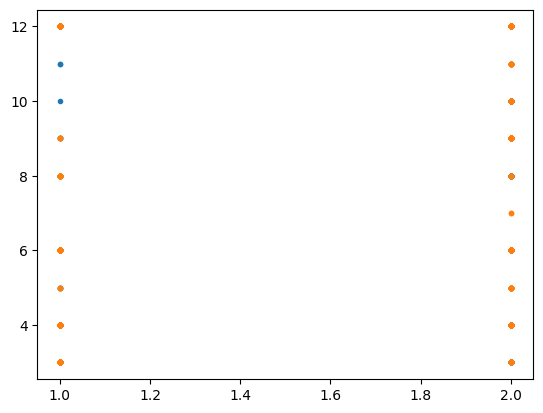

In [3]:
from DGE_experiments import predictive_experiment
import pandas as pd


all_means = {}
all_stds = {}

#datasets = ['moons', 'circles', 'breast_cancer', 'adult', 'covid', 'seer']
datasets = ['covid']
#num_runs=10
model_type = 'deepish_mlp'

for dataset in datasets:
    workspace_folder, results_folder = get_folder_names(
        dataset, model_name, max_n=max_n, nsyn=nsyn)

    workspace_folder = f"{workspace_folder}_test_synthcity_ctgan_modified"
    results_folder = f"{results_folder}_test_synthcity_ctgan_modified"

    # X_gt, X_syns = get_real_and_synthetic(dataset=dataset,
    #                                       n_models=n_models*num_runs,
    #                                       model_name=model_name,
    #                                       load_syn=load_syn,
    #                                       verbose=verbose,
    #                                       max_n=max_n,
    #                                       nsyn=nsyn)
    X_gt = load_real_data(dataset, max_n=max_n)
    X_train, X_test = X_gt.train(), X_gt.test()

    X_train.targettype = X_gt.targettype
    X_test.targettype = X_gt.targettype
    X_gt.dataset = dataset
    n_train = X_train.shape[0]

    if nsyn == 'train' or nsyn is None:
        nsyn = n_train

    data_folder = os.path.join("synthetic_data_testing",dataset,model_name)
    print('n_total', X_gt.shape[0], 'n_train:', n_train)

    # generate synthetic data for all number of training samples
    X_syns = get_synthetic_data(X_gt, model_name,
                                n_models=n_models,
                                nsyn=nsyn,
                                data_folder=data_folder,
                                load_syn=load_syn,
                                save=save,
                                verbose=verbose)

    for i in range(len(X_syns)):
        X_syns[i].dataset = dataset
        X_syns[i].targettype = X_gt.targettype
        X_syns[i].dataset = dataset

    print("Before covid dataset target change: \n", X_gt['target'])
    if dataset == 'covid':
        X_gt['target'] = (X_gt['target']-1).astype(bool)
        for i in range(len(X_syns)):
            X_syns[i]['target'] = (X_syns[i]['target']-1).astype(bool)
    
    print("After covid dataset target change: \n", X_gt['target'])

    print(f'Dataset {dataset}\n')

    means, stds, _ = predictive_experiment(X_gt,
                                            X_syns,
                                            workspace_folder=workspace_folder,
                                            results_folder=results_folder,
                                            save=save,
                                            load=load,
                                            plot=False,
                                            task_type = model_type
                                            )

    print(means.to_latex())

    all_means[dataset] = means
    all_stds[dataset] = stds